TextRank 算法是一种基于图的排名算法，它最初是为了关键词提取和文本摘要而设计的。以下是 TextRank 算法的主要原理：

1. **构建图模型：** 将文本中的词语视为图中的节点，使用某种关系度量（例如共现关系、相似度等）作为边的权重。文本中的每个句子也可以作为节点，同样使用某种关系度量作为边的权重。这样，就构建了一个带权重的无向图。

2. **计算节点的重要性：** 使用图中的排名算法（通常是 PageRank）计算每个节点（词语或句子）的重要性得分。PageRank 的计算考虑了节点之间的连接关系，节点的得分取决于连接到它的节点的得分和连接的边的权重。

3. **迭代计算：** 对于给定的迭代次数或收敛条件，不断迭代更新节点的得分，直到达到停止条件。

4. **提取关键词或生成摘要：** 根据节点的得分，选择得分高的节点作为关键词或用于生成文本摘要的句子。

下面是一个更具体的 TextRank 算法的步骤：

- **预处理：** 对文本进行预处理，包括分句、分词、去除停用词等。

- **构建图：** 根据文本的内容构建图，其中节点是词语或句子，边的权重表示它们之间的关系。通常使用共现关系或者词语相似度来定义边的权重。

- **计算相似度矩阵：** 如果是基于词语的 TextRank，计算词语之间的相似度矩阵；如果是基于句子的 TextRank，计算句子之间的相似度矩阵。

- **构建图模型：** 使用相似度矩阵构建图，其中节点是词语或句子，边的权重是相似度。

- **应用 PageRank：** 使用 PageRank 算法计算节点的得分，得分高的节点被认为是重要的。

- **提取关键词或生成摘要：** 根据节点得分，选择得分高的词语或句子作为关键词或生成摘要的内容。

总体来说，TextRank 利用图模型和排名算法的思想，通过识别文本中的重要节点（词语或句子），从而实现关键词提取和文本摘要的目的。


以下是一个简单的 TextRank 算法的 Python 代码示例：

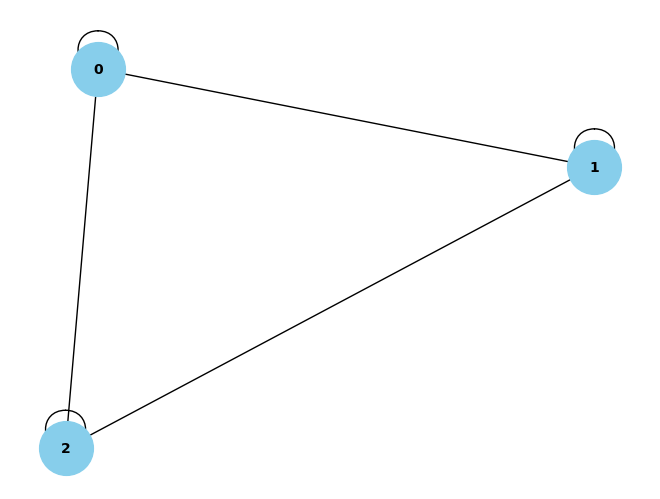

Keywords: [0, 1, 2]


In [2]:
import numpy as np
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def textrank(texts, num_keywords=5):
    # 使用CountVectorizer将文本转换为词频矩阵
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(texts)
    
    # 计算词语之间的余弦相似度作为图中边的权重
    similarity_matrix = cosine_similarity(matrix)
    
    # 使用networkx构建图模型
    G = nx.from_numpy_array(similarity_matrix)
    
    # 使用PageRank算法计算节点的重要性
    scores = nx.pagerank(G)
    
    # 提取得分最高的关键词
    keywords = sorted(scores, key=scores.get, reverse=True)[:num_keywords]
    
    # 绘制图形
    pos = nx.spring_layout(G)  # 选择布局算法
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, font_size=10)
    plt.show()

    return keywords

# 示例文本
texts = [
    "TextRank is an algorithm for keyword and sentence extraction.",
    "It's based on graph theory and PageRank algorithm.",
    "TextRank has applications in natural language processing and information retrieval."
]

# 获取关键词并绘制图形
keywords = textrank(texts)

# 打印结果
print("Keywords:", keywords)


在上述代码中，textrank 函数接受一个包含多个文本的列表，然后使用 CountVectorizer 将文本转换为词频矩阵。接下来，计算余弦相似度矩阵，构建图模型，并使用 PageRank 算法计算节点的重要性。最后，提取得分最高的节点作为关键词。

请注意，这只是 TextRank 算法的一个简单实现示例，实际应用中可能需要更复杂的处理和优化。